In [134]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题)

In [253]:
df_train = pd.read_csv('pfm_train.csv', index_col='EmployeeNumber')
df_test = pd.read_csv('pfm_test.csv', index_col='EmployeeNumber')

In [254]:
df_train.apply(lambda x: sum(x.isnull()))

Age                           0
Attrition                   350
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
source                        0
dtype: i

数据很完整，没有缺失值。“Attrition”的缺失值来自于测试集的350个数据。

In [258]:
pd.concat([df_train.apply(lambda x: len(x.unique())),df_train.dtypes],axis=1)

,0,1
Age,43,int64
Attrition,3,float64
BusinessTravel,3,object
Department,3,object
DistanceFromHome,29,int64
Education,5,int64
EducationField,6,object
EnvironmentSatisfaction,4,int64
Gender,2,object
JobInvolvement,4,int64


从每个变量的唯一值可以看出，“Over18"和"StandHours"都只有一个值，即都是18岁以上，并且标准工作时间都是80小时，这两个变量对分析没有影响，可以忽略。<br>

In [259]:
df_train.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1450.000000,1100.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.0,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.00000,1450.000000
mean,36.871724,0.161818,9.177241,2.909655,2.722759,2.731724,2.057931,2.731034,6482.624138,2.685517,...,2.708276,80.0,0.795172,11.217241,2.801379,2.761379,6.956552,4.220000,2.16000,4.097931
std,9.119033,0.368451,8.085783,1.023925,1.090314,0.711068,1.103084,1.103074,4694.115546,2.496457,...,1.082390,0.0,0.853752,7.738772,1.292009,0.706588,6.053036,3.617954,3.18867,3.546603
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2909.500000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.00000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4903.500000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.00000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8339.750000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.75000,7.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.00000,17.000000


从对数值型变量的描述可以看出，平均年龄是37岁，16%的员工已经离职。其他的数据以为能力有限，没看出来明显的特征。

## 各特征对离职率的影响

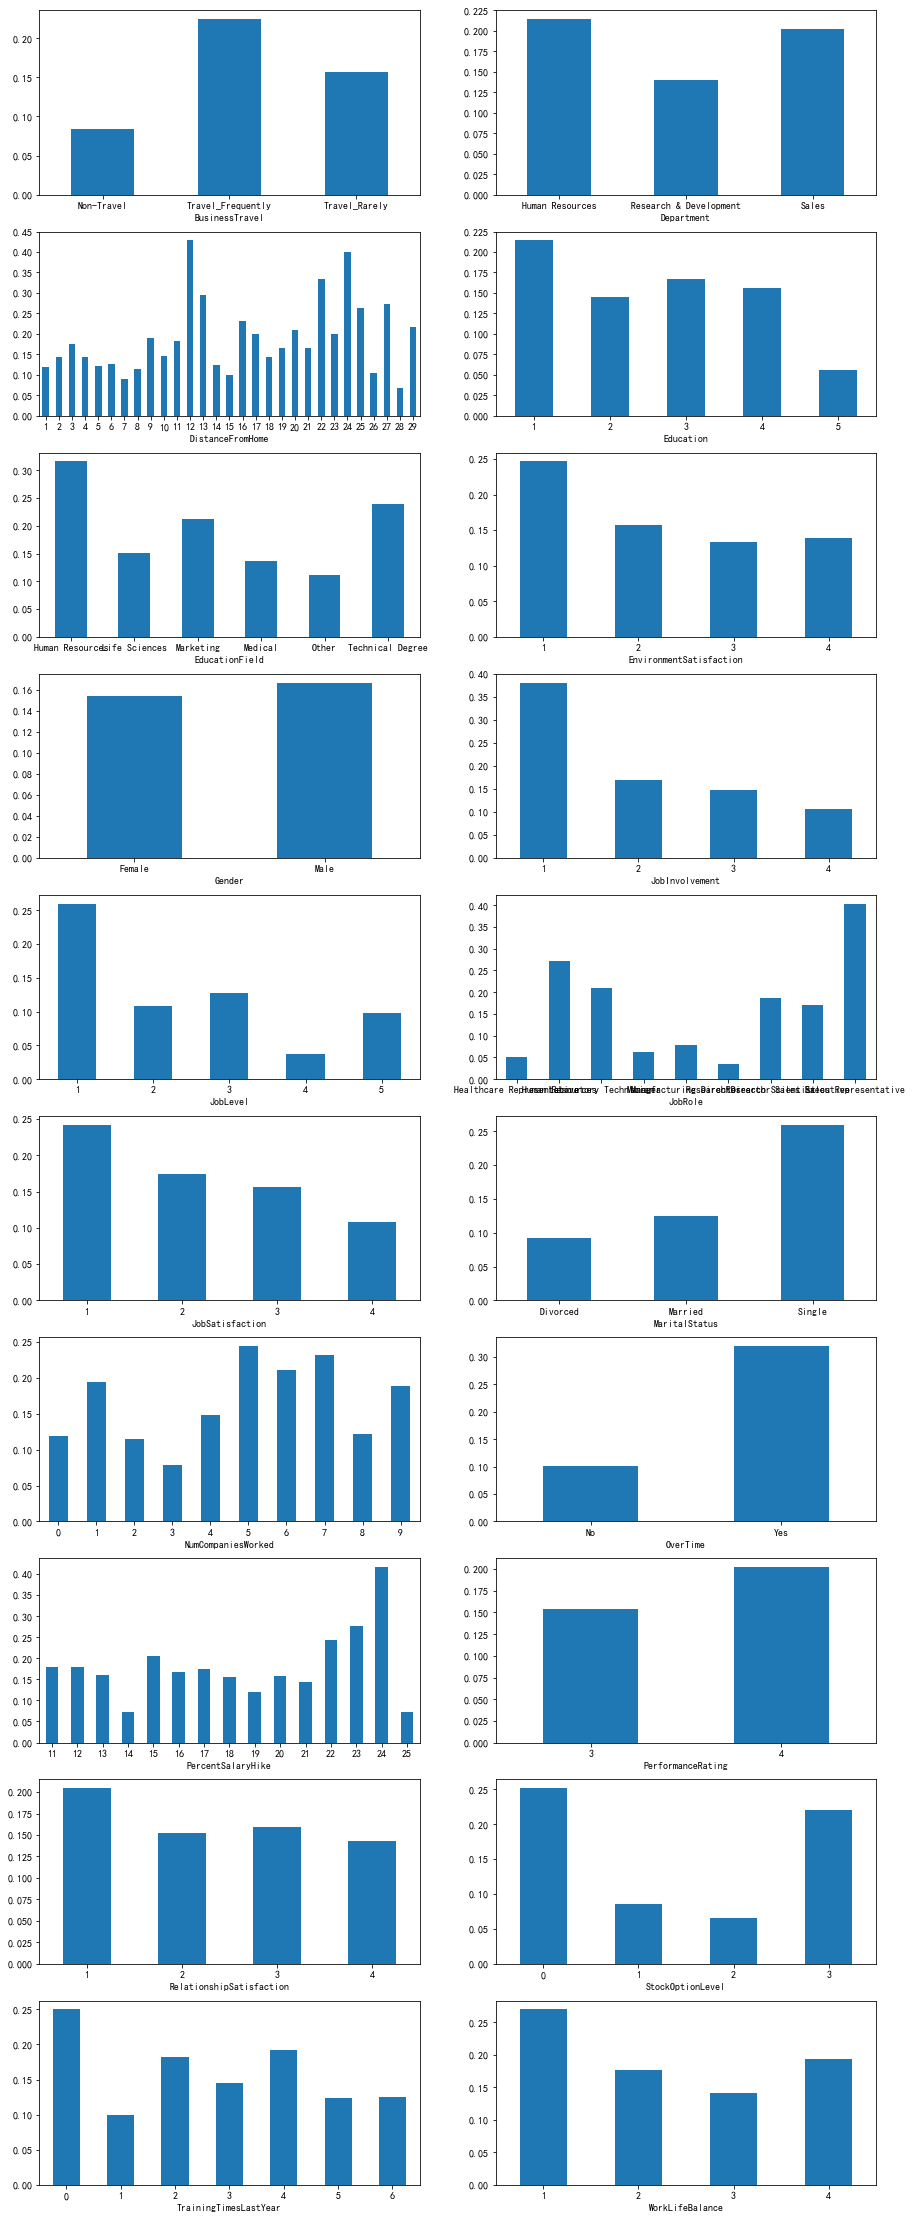

In [7]:
categorical_columns = [x for x in list(df_train.columns) if x not in ['Age','Attrition','MonthlyIncome',
                                                          'TotalWorkingYears','YearsAtCompany',
                                                         'YearsInCurrentRole','YearsSinceLastPromotion',
                                                         'YearsWithCurrManager','Over18','StandardHours','source']]
n=0
fig, ax = plt.subplots(nrows=10,ncols=2,figsize=(15,40))
for x in range(10):
    for y in range(2):
        df_train.groupby(categorical_columns[n])['Attrition'].mean().plot(kind='bar',ax=ax[x][y],rot=0)
        n+=1

### 年龄

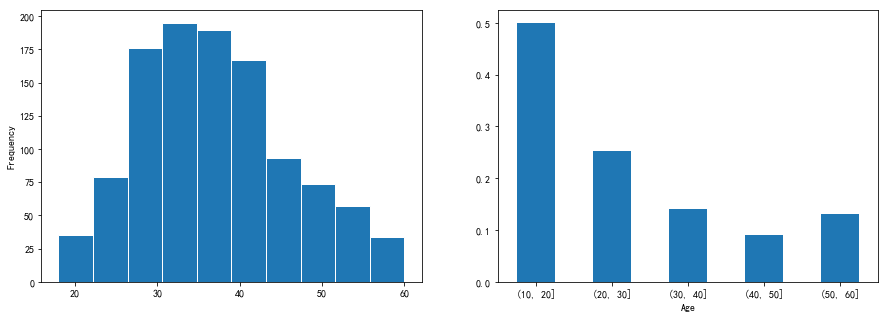

In [267]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_train['Age'].plot(kind='hist',edgecolor='w',ax=ax[0])
factor = pd.cut(df_train['Age'], range(10, 65, 10))
df_train.groupby(factor)['Attrition'].mean().plot(kind='bar',ax=ax[1],rot=0)

20岁以下的员工离职率是最高的，有50%，随着年龄的增长，离职率逐渐下降，但是在50岁以上的年龄中，离职率又开始上升，可见，年龄与离职有一定的关系，是一个比较好的分类变量。
### 月收入

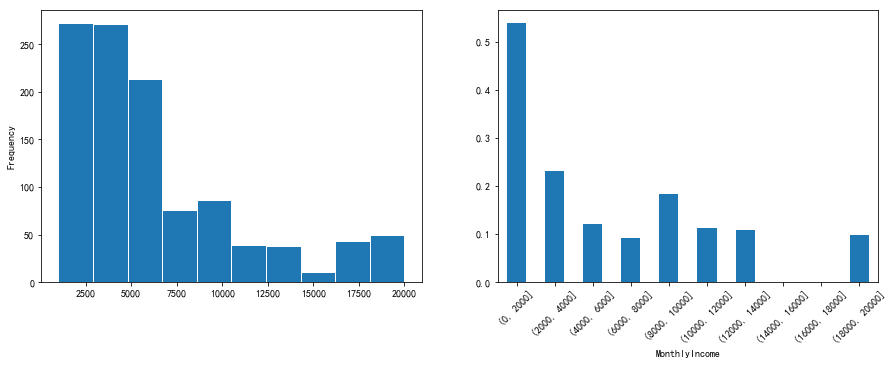

In [271]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_train['MonthlyIncome'].plot(kind='hist',edgecolor='w',ax=ax[0], bins=10)
factor_MonthlyIncome = pd.cut(df_train['MonthlyIncome'], range(0, 22000, 2000))
df_train.groupby(factor_MonthlyIncome)['Attrition'].mean().plot(kind='bar',ax=ax[1],rot=45)

### 工龄

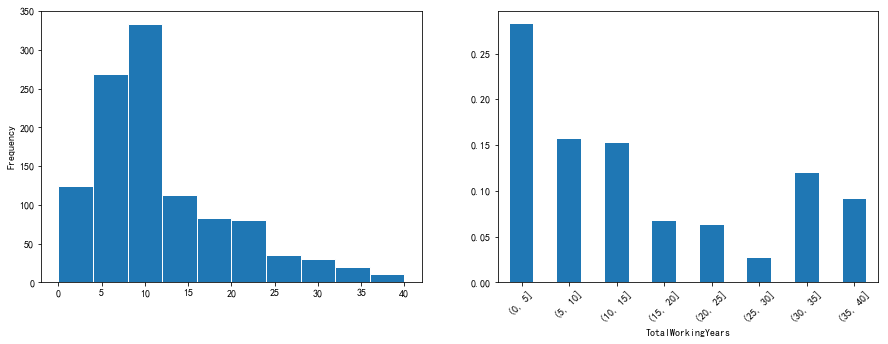

In [272]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_train['TotalWorkingYears'].plot(kind='hist',edgecolor='w',ax=ax[0], bins=10)
factor_WorkingYears = pd.cut(df_train['TotalWorkingYears'], range(0, 45, 5))
df_train.groupby(factor_WorkingYears)['Attrition'].mean().plot(kind='bar',ax=ax[1],rot=45)

## 数据预处理
### 

In [16]:
dummy_columns = ['BusinessTravel',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

for col in dummy_columns:
    temp = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,temp],axis=1)
    df.drop([col],axis=1, inplace=True)

In [17]:
df.drop(['Department', 'Gender','NumCompaniesWorked','Over18',
         'PerformanceRating','RelationshipSatisfaction','StandardHours'],axis=1, inplace=True)

In [18]:
import sklearn.preprocessing as preprocessing
import numpy as np
scaler = preprocessing.StandardScaler()

for col in ['Age','MonthlyIncome','TotalWorkingYears',
            'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
            'YearsWithCurrManager']:
    temp = np.reshape(df_train[col],(-1,1))
    scale_param = scaler.fit(temp)
    scaler_var = col + '_scaled'
    df_train[scaler_var] = np.reshape(scaler.fit_transform(temp, scale_param),(-1,1))
    
    temp = np.reshape(df_test[col],(-1,1))
    scale_param = scaler.fit(temp)
    scaler_var = col + '_scaled'
    df_test[scaler_var] = np.reshape(scaler.fit_transform(temp, scale_param),(-1,1))

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
predictor_var = [x for x in list(df.columns) if x not in ['Attrition','MonthlyIncome','TotalWorkingYears',
            'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
            'YearsWithCurrManager','source']]
outcome_var = 'Attrition'

df_train = df[df['source']=='train']
df_test = df[df['source']=='test']

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(df_train[predictor_var],df_train[outcome_var])
predictions = clf.predict(df_test[predictor_var])
result = pd.DataFrame({'result':predictions.astype(np.int32)})
result.to_csv('result.csv')

第一次提交，得分0.88571。

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


(0.88077312996041157, 0.052886753479828852)

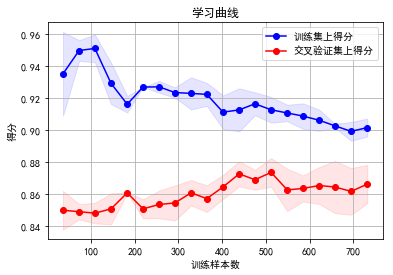

In [21]:
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        #plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线",df_train[predictor_var],df_train[outcome_var])

从学习曲线上看，有些过拟合，在测试集上的得分明显低于训练集得分。

In [22]:
coef_df = pd.DataFrame({"columns":predictor_var, "coef":list(clf.coef_.T)})
coef_df.to_csv('coef.csv')

结合各系数和对各变量的分析，如果某一变量的离职率高于0.15，与最后结果是正相关，如果离职率低于0.15，则与最后结果是负相关。

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf, df_train[predictor_var],df_train[outcome_var], cv=5))
split_train, split_cv = train_test_split(df_train, test_size=0.3, random_state=0)
clf.fit(split_train[predictor_var],split_train[outcome_var])
predictions = clf.predict(split_cv[predictor_var])
score = accuracy_score(predictions,split_cv[outcome_var])
print('accuracy score is %.4f'%score)
bad_cases = split_cv[ predictions != split_cv[outcome_var]]
#result = pd.DataFrame({'result':predictions.astype(np.int32)})
#result.to_csv('result.csv')

[ 0.87782805  0.87330317  0.86363636  0.85844749  0.84018265]
accuracy score is 0.8818


In [24]:
#origin_data_train = pd.read_csv("pfm_train.csv", index_col='EmployeeNumber')
#origin_data_train.loc[list(bad_cases.index),:].to_csv('temp.csv')

## 减少变量

In [77]:
df_train = pd.read_csv('pfm_train.csv', index_col='EmployeeNumber')
df_test = pd.read_csv('pfm_test.csv', index_col='EmployeeNumber')
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train,df_test],axis=0)

df.drop(['Department', 'Gender','NumCompaniesWorked','Over18',
         'PerformanceRating','RelationshipSatisfaction','StandardHours'],axis=1, inplace=True)

numerical_columns = ['Age','MonthlyIncome','TotalWorkingYears',
                     'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                     'YearsWithCurrManager']
categorical_columns = [x for x in df.columns if x not in numerical_columns and\
                       x not in ['Attrition','source']]

for col in categorical_columns:
    temp = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,temp],axis=1)
    df.drop([col],axis=1, inplace=True)
    
    
for col in numerical_columns:
    temp = np.reshape(df[col],(-1,1))
    scale_param = scaler.fit(temp)
    scaler_var = col + '_scaled'
    df[scaler_var] = np.reshape(scaler.fit_transform(temp, scale_param),(-1,1))
    df.drop([col],axis=1, inplace=True)
    
df_train = df[df['source']=='train']
df_test = df[df['source']=='test']

predictor_var = [x for x in list(df.columns) if x not in ['Attrition','source']]
outcome_var = 'Attrition'

print(cross_val_score(clf, df_train[predictor_var],df_train[outcome_var], cv=5))
split_train, split_cv = train_test_split(df_train, test_size=0.3, random_state=0)
clf.fit(split_train[predictor_var],split_train[outcome_var])
predictions = clf.predict(split_cv[predictor_var])
score = accuracy_score(predictions,split_cv[outcome_var])
print('accuracy score is %.4f'%score)
bad_cases = split_cv[ predictions != split_cv[outcome_var]]

df_origin = pd.read_csv('pfm_train.csv', index_col='EmployeeNumber')
df_origin.loc[split_cv.index,'predictions'] = predictions
df_origin.loc[bad_cases.index,:].to_csv('badcase.csv')

clf.fit(df_train[predictor_var],df_train[outcome_var])
predictions = clf.predict(df_test[predictor_var])
result = pd.DataFrame({'result':predictions.astype(np.int32)})
result.to_csv('result.csv')

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[ 0.87330317  0.87782805  0.86363636  0.85844749  0.8630137 ]
accuracy score is 0.8788


In [121]:
pd.DataFrame({"columns":predictor_var, "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.843072882728],BusinessTravel_Non-Travel
1,[0.78671709672],BusinessTravel_Travel_Frequently
2,[0.0],BusinessTravel_Travel_Rarely
3,[0.0],Department_Human Resources
4,[0.0],Department_Research & Development
5,[0.505908226484],Department_Sales
6,[-0.744837315632],DistanceFromHome_1
7,[-0.455510721466],DistanceFromHome_2
8,[-0.203426833533],DistanceFromHome_3
9,[-0.904724604589],DistanceFromHome_4


(0.88947902397142409, 0.049348637574827547)

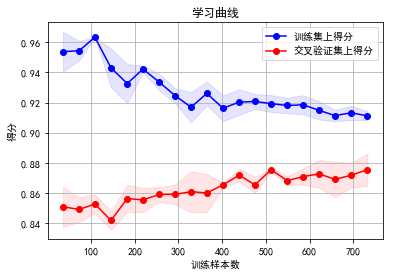

In [207]:
plot_learning_curve(clf, u"学习曲线",df_train[predictor_var],df_train[outcome_var])

In [248]:
clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
df_train = pd.read_csv('pfm_train.csv', index_col='EmployeeNumber')
df_test = pd.read_csv('pfm_test.csv', index_col='EmployeeNumber')

df_train.drop(['Over18','StandardHours','Gender'],axis=1, inplace=True)

numerical_columns = ['Age','MonthlyIncome','TotalWorkingYears','NumCompaniesWorked',
                     'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                     'YearsWithCurrManager']
categorical_columns = [x for x in df_train.columns if x not in numerical_columns and\
                       x not in ['Attrition']]
#可以用sklearn中的OneHotEncoder，但是返回值是矩阵，不知道怎么放到DataFrame中，用pandas中的get_dummies
for col in categorical_columns:
    temp = pd.get_dummies(df_train[col],prefix=col)
    df_train = pd.concat([df_train,temp],axis=1)
    df_train.drop([col],axis=1, inplace=True)
    
    
for col in numerical_columns:
    temp = np.array(df_train[col]).reshape((-1,1)).astype(np.float64)
    scale_param = scaler.fit(temp)
    scaler_var = col + '_scaled'
    df_train[scaler_var] = np.reshape(scaler.fit_transform(temp, scale_param),(-1,1))

df_train.drop(numerical_columns,axis=1, inplace=True)

predictor_var = [x for x in list(df_train.columns) if x not in ['Attrition']]
outcome_var = 'Attrition'

print(cross_val_score(clf, df_train[predictor_var],df_train[outcome_var], cv=5))
split_train, split_cv = train_test_split(df_train, test_size=0.3, random_state=0)
clf.fit(split_train[predictor_var],split_train[outcome_var])

predictions = clf.predict(split_train[predictor_var])
score = accuracy_score(predictions,split_train[outcome_var])
print('accuracy score of train set is %.4f'%score)

predictions = clf.predict(split_cv[predictor_var])
score = accuracy_score(predictions,split_cv[outcome_var])
print('accuracy score of test set is %.4f'%score)

fpr, tpr, thresholds = roc_curve(split_cv[outcome_var], predictions, pos_label=1)
print('the auc is %.4f'%auc(fpr, tpr))
pd.DataFrame({"columns":predictor_var, "coef":list(clf.coef_.T)}).to_csv('coef.csv')


#对测试集进行处理
df_test.drop(['Over18','StandardHours','Gender'],axis=1, inplace=True)

#可以用sklearn中的OneHotEncoder，但是返回值是矩阵，不知道怎么放到DataFrame中，用pandas中的get_dummies
for col in categorical_columns:
    temp = pd.get_dummies(df_test[col],prefix=col)
    df_test = pd.concat([df_test,temp],axis=1)
    df_test.drop([col],axis=1, inplace=True)
    
    
for col in numerical_columns:
    temp = np.array(df_test[col]).reshape((-1,1)).astype(np.float64)
    scale_param = scaler.fit(temp)
    scaler_var = col + '_scaled'
    df_test[scaler_var] = np.reshape(scaler.fit_transform(temp, scale_param),(-1,1))

df_test.drop(numerical_columns,axis=1, inplace=True)


predictions = clf.predict(df_test[predictor_var])
result = pd.DataFrame({'result':predictions.astype(np.int32)})
result.to_csv('result.csv')

[ 0.87782805  0.87782805  0.86818182  0.87214612  0.86757991]
accuracy score of train set is 0.9000
accuracy score of test set is 0.9061
the auc is 0.7462
